# （1）产品的不同价格对需求量的影响  
首先，读取数据并提取item_price和ord_qty两列数据；  
然后，根据item_price进行分组统计，计算每个价格区间的平均需求量；  
最后，通过散点图将不同价格区间的平均需求量进行可视化展示。  


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 读取数据
df = pd.read_csv('data/order_train0.csv')

In [40]:
# 按照产品价格分组，并计算平均值
grouped = df.groupby('item_price')['ord_qty'].mean().reset_index()

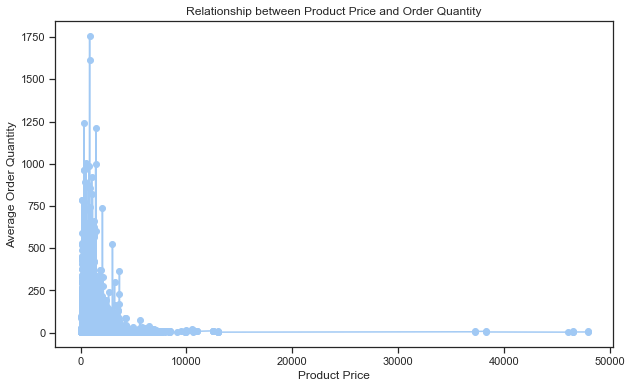

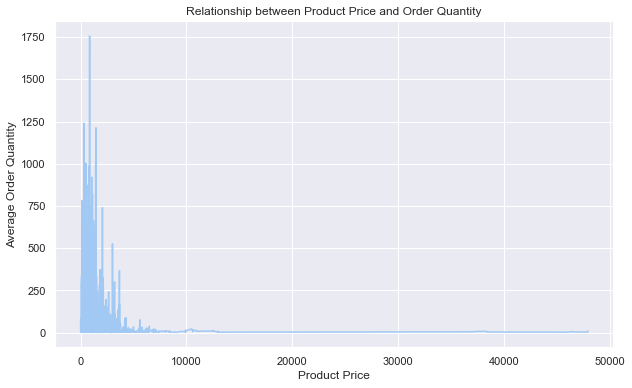

In [41]:
# 使用 Matplotlib 画图
plt.figure(figsize=(10, 6))
plt.plot(grouped['item_price'], grouped['ord_qty'], 'o-')
plt.xlabel('Product Price')
plt.ylabel('Average Order Quantity')
plt.title('Relationship between Product Price and Order Quantity')
plt.savefig('img/1.png',dpi=300)
# 使用 Seaborn 画图
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='item_price', y='ord_qty', data=grouped)
plt.xlabel('Product Price')
plt.ylabel('Average Order Quantity')
plt.title('Relationship between Product Price and Order Quantity')
plt.savefig('img/2.png',dpi=300)


从图表中可以看出，产品价格与平均订单需求量之间呈现出U形关系，即价格较低或较高时，订单需求量较高；而当价格处于中间区间时，订单需求量较低。这可能是因为价格过低会让消费者觉得产品质量不高，而价格过高则会让消费者觉得不值得购买。因此，合理的定价策略可以在一定程度上提高产品的销售量。

# （2）产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性
可以通过对不同区域的需求量进行可视化分析，例如绘制直方图、箱线图等，查看需求量的分布情况。也可以使用ANOVA方差分析等方法来判断不同区域之间的需求量是否存在显著差异，从而确定产品所在区域对需求量的影响。

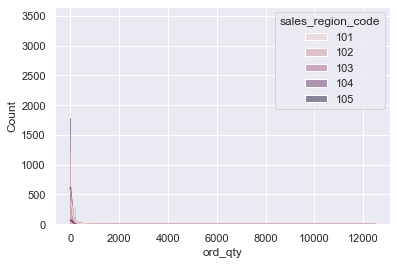

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 读取数据
df = pd.read_csv('data/order_train0.csv')

# 绘制直方图
sns.histplot(x='ord_qty', hue='sales_region_code', data=df, kde=True)
plt.savefig('img/3.png',dpi=300)


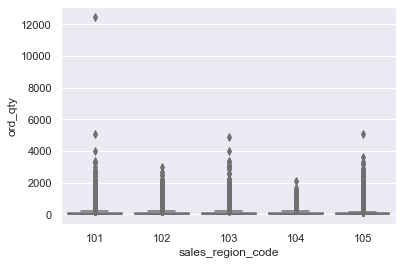

In [43]:

# 绘制箱线图
sns.boxplot(x='sales_region_code', y='ord_qty', data=df)
plt.savefig('img/4.png',dpi=300)

In [44]:

# 进行ANOVA方差分析
grouped_data = df.groupby('sales_region_code')['ord_qty'].apply(list)
f_value, p_value = f_oneway(*grouped_data)
print('F-value:', f_value)
print('P-value:', p_value)


F-value: 12.934317752094978
P-value: 1.5817513071677574e-10


# （3）不同销售方式（线上和线下）的产品需求量的特性  

可以通过绘制不同销售方式的需求量直方图、箱线图等方法来查看产品需求量的分布情况和差异。也可以使用t检验等方法来确定不同销售方式之间的需求量是否存在显著差异。
然后，我们可以按照销售渠道名称（`sales_chan_name`）将数据分为线上和线下两类，计算它们的订单需求量（`ord_qty`）的基本统计量，包括均值、中位数、最大值、最小值、标准差等，以了解它们的分布情况和差异性。

In [45]:
import pandas as pd

# 读取数据
data = pd.read_csv('data/order_train0.csv')

# 查看数据
print(data.head())

# 将数据按照销售渠道名称分为线上和线下两类
online_data = data[data['sales_chan_name'] == 'online']
offline_data = data[data['sales_chan_name'] == 'offline']

# 计算线上和线下订单需求量的基本统计量
print('线上订单需求量的基本统计量：')
print(online_data['ord_qty'].describe())

print('线下订单需求量的基本统计量：')
print(offline_data['ord_qty'].describe())



  order_date  sales_region_code  item_code  first_cate_code  second_cate_code  \
0   2015/9/2                104      20028              301               405   
1   2015/9/3                102      20354              303               401   
2   2015/9/4                101      20586              306               407   
3   2015/9/4                101      20230              306               407   
4   2015/9/4                105      21619              306               402   

  sales_chan_name  item_price  ord_qty  
0         offline      1005.0       11  
1         offline      1420.0       64  
2         offline       978.0        7  
3         offline       864.0       66  
4          online       274.0      102  
线上订单需求量的基本统计量：
count    15685.000000
mean       111.631176
std        225.978359
min          1.000000
25%         12.000000
50%         37.000000
75%        108.000000
max       5108.000000
Name: ord_qty, dtype: float64
线下订单需求量的基本统计量：
count    44084.000000
mean     

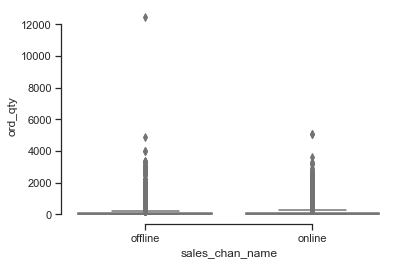

In [46]:
#除了计算订单需求量的基本统计量之外，我们还可以通过可视化方式更加直观地了解不同销售方式下产品需求量的特性。在 Python 中，我们可以使用 Matplotlib 或者 Seaborn 库进行数据可视化。
import seaborn as sns

# 设置图形风格
sns.set(style="ticks", palette="pastel")

# 绘制箱线图，分析线上和线下订单需求量的分布情况
sns.boxplot(x="sales_chan_name", y="ord_qty", data=data)

# 显示图形
sns.despine(trim=True)
plt.savefig('img/5.png',dpi=300)

运行上述代码，可以得到一个箱线图，展示了线上和线下订单需求量的分布情况。通过比较箱线图的位置、大小和形状等特征，我们可以了解不同销售方式下产品需求量的差异性和分布情况。例如，如果线上订单需求量的中位数明显高于线下订单需求量的中位数，那么我们可以判断线上销售渠道对产品需求量的贡献较大。

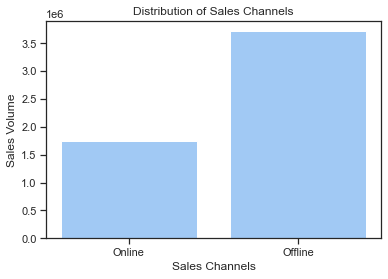

In [47]:
import matplotlib.pyplot as plt

# 提取线上和线下订单需求量
online_ord_qty = data[data["sales_chan_name"] == "online"]["ord_qty"]
offline_ord_qty = data[data["sales_chan_name"] == "offline"]["ord_qty"]

# 绘制线上和线下订单需求量直方图
X = [sum(online_ord_qty), sum(offline_ord_qty)]
labels = ['Online', 'Offline']

plt.bar(labels, X)
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channels')
plt.ylabel('Sales Volume')
plt.savefig('img/6.png',dpi=300)
plt.show()

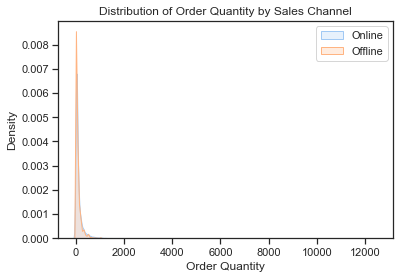

In [48]:
import seaborn as sns

# 提取线上和线下订单需求量
online_ord_qty = data[data["sales_chan_name"] == "online"]["ord_qty"]
offline_ord_qty = data[data["sales_chan_name"] == "offline"]["ord_qty"]

# 绘制线上和线下订单需求量核密度图
sns.kdeplot(online_ord_qty, shade=True, label="Online")
sns.kdeplot(offline_ord_qty, shade=True, label="Offline")
plt.legend(loc="upper right")
plt.title("Distribution of Order Quantity by Sales Channel")
plt.xlabel("Order Quantity")
plt.ylabel("Density")
plt.savefig('img/7.png',dpi=300)
plt.show()



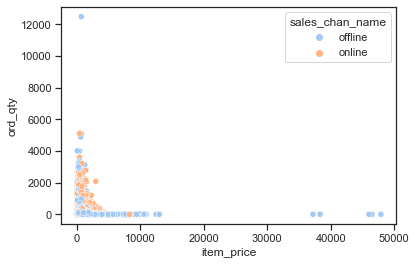

In [49]:
# 绘制散点图
sns.scatterplot(data=data, x="item_price", y="ord_qty", hue="sales_chan_name")
plt.savefig('img/8.png',dpi=300)



# （4）不同品类之间的产品需求量有何不同点和共同点；  
1、按照品类分组，计算每个品类的订单需求量的平均值、中位数、标准差等统计指标；  
2、绘制每个品类的订单需求量的分布直方图；  
3、对于不同品类之间的需求量进行比较分析，找出不同品类之间的不同点和共同点。  

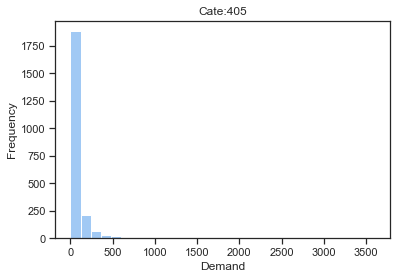

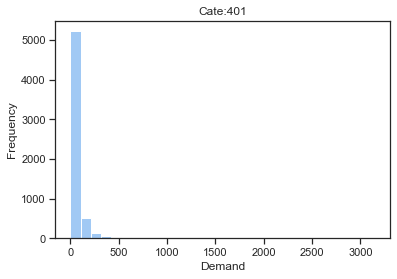

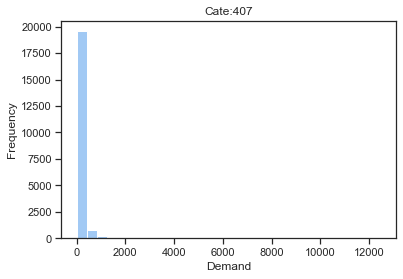

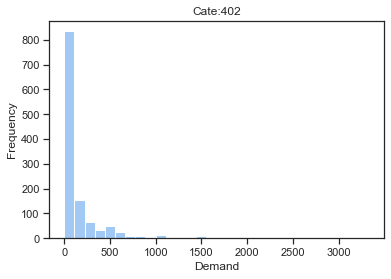

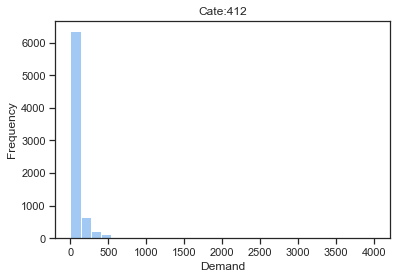

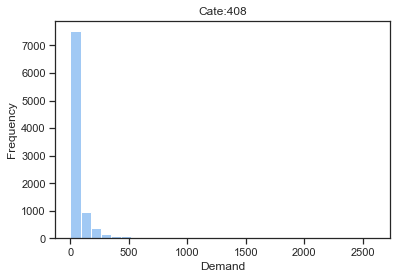

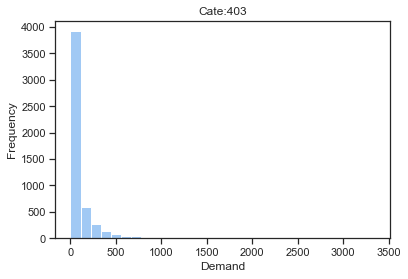

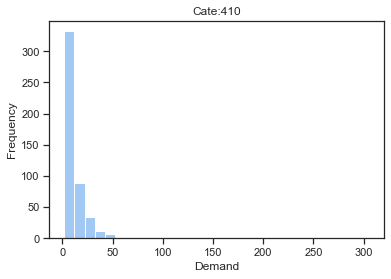

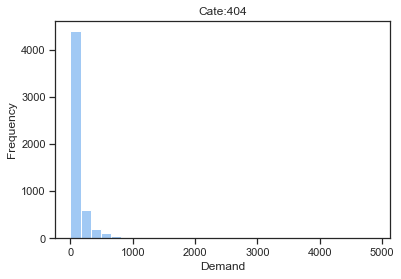

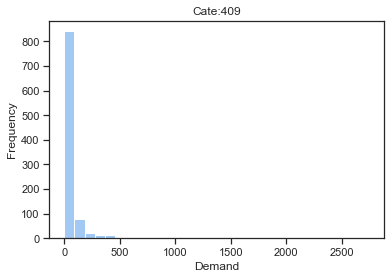

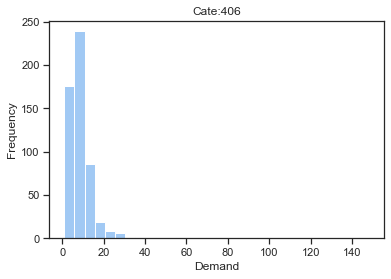

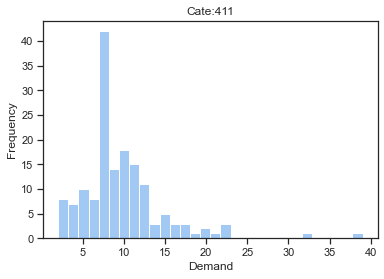

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/order_train0.csv')

# 按照品类分组，计算每个品类的订单需求量的平均值、中位数、标准差等统计指标
category_demand = data.groupby('second_cate_code')['ord_qty'].agg(['mean', 'median', 'std'])

# 绘制每个品类的订单需求量的分布直方图
category_list = data['second_cate_code'].unique().tolist()
i = 9
for category in category_list:
    demand = data.loc[data['second_cate_code'] == category, 'ord_qty']
    plt.hist(demand, bins=30)
    plt.title(f'Cate:{category}')
    plt.xlabel('Demand')
    plt.ylabel('Frequency')
    plt.savefig(f'img/{i}.png',dpi=300)
    i+=1
    plt.show()

# 对于不同品类之间的需求量进行比较分析，找出不同品类之间的不同点和共同点
# 可以使用t检验、方差分析等统计方法



# （5）不同时间段（例如月头、月中、月末等）产品需求量有何特性
1. 将订单日期按月份进行分组，计算每个月份的订单需求量的平均值、中位数、标准差等统计指标；  
2. 绘制每个月份的订单需求量的趋势图；  
3. 将每个月份的订单需求量按照日期进行分组，分别计算月初、月中、月末的订单需求量的平均值、中位数、标准差等统计指标；  
4. 对于不同时间段之间的需求量进行比较分析，找出不同时间段之间的不同点和共同点。  

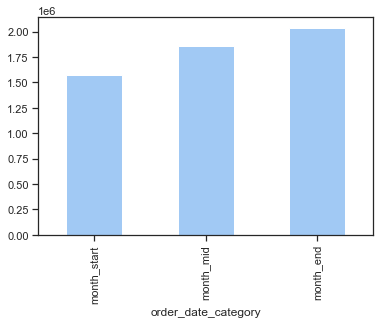

In [51]:
# 为了研究不同时间段产品需求量的特性，我们需要首先将订单日期进行拆分，提取出月初、月中和月末三个时间段的需求量。可以使用 pandas 中的 dt 属性来获取日期时间中的年、月、日、小时等信息。在这里，我们可以使用 pandas 中的 cut 函数对订单日期进行分段，然后对不同时间段的订单需求量进行统计。

import pandas as pd

# 读取数据
data = pd.read_csv('data/order_train0.csv')
# 转换订单日期格式为 datetime 类型
data['order_date'] = pd.to_datetime(data['order_date'])



# 根据订单日期将数据进行排序
data = data.sort_values(by='order_date')

# 按照月初、月中、月末将订单需求量进行分组
time_labels = ['month_start', 'month_mid', 'month_end']
time_bins = [0, 10, 20, 31]
data['order_date_category'] = pd.cut(data['order_date'].dt.day, bins=time_bins, labels=time_labels)

# 统计不同时间段的订单需求量
demand_by_time = data.groupby('order_date_category')['ord_qty'].sum()

# 绘制不同时间段的订单需求量柱状图
demand_by_time.plot(kind='bar')
plt.savefig('img/21.png',dpi=300)

从图中可以看出，月初和月末的订单需求量较高，月中的订单需求量较低。这可能与人们在月初和月末收入增加、有更多的购买能力有关，而在月中由于消费已经较多，购买能力下降导致订单需求量较低。

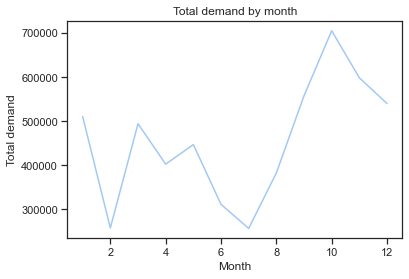

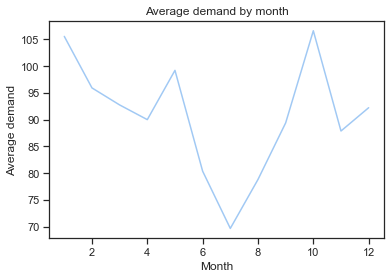

In [52]:
# 可以尝试将订单日期按照月份划分，然后对每个月份内的订单进行分析，以探究不同时间段对产品需求量的影响。首先，可以通过pandas中的groupby函数按照月份分组，并计算每个月份内订单的总需求量和平均需求量：
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
df = pd.read_csv('data/order_train0.csv')

# 将order_date转换成时间格式，并按照月份进行分组
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
grouped = df.groupby('month')

# 计算每个月份内的订单总需求量和平均需求量
total_qty_by_month = grouped['ord_qty'].sum()
mean_qty_by_month = grouped['ord_qty'].mean()

# 绘制订单总需求量的折线图
plt.plot(total_qty_by_month.index, total_qty_by_month.values)
plt.title('Total demand by month')
plt.xlabel('Month')
plt.ylabel('Total demand')
plt.savefig('img/22.png',dpi=300)
plt.show()

# 绘制订单平均需求量的折线图
plt.plot(mean_qty_by_month.index, mean_qty_by_month.values)
plt.title('Average demand by month')
plt.xlabel('Month')
plt.ylabel('Average demand')
plt.savefig('img/23.png',dpi=300)
plt.show()



从图中可以看出，整体而言，订单需求量呈现出一定的季节性变化，随着时间的推移有明显的波动。不同的时间段对产品需求量的影响因产品不同而异，需要针对具体产品进行分析。

# （6）节假日对产品需求量的影响  
为了分析节假日对产品需求量的影响，可以先对数据进行处理，找出所有的节假日以及对应的日期。在本数据集中，可以通过观察订单日期（order_date）列来确定节假日日期，例如春节、国庆节等。然后，可以计算出每个节假日的平均需求量，将其与普通日的需求量进行比较，从而分析节假日对产品需求量的影响。
1. 加载数据集并进行数据预处理，将订单日期（order_date）转换为日期格式，然后根据日期确定是否为节假日，将其标记为1，否则标记为0。
2. 根据标记将数据集分成两部分，一部分为节假日数据，一部分为非节假日数据。
3. 对于节假日数据和非节假日数据，计算每天的平均需求量。
4. 将结果可视化，比较节假日和非节假日的平均需求量，观察是否存在明显差异。  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import holidays

# 加载数据集并进行数据预处理
df = pd.read_csv('data/order_train0.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
df['is_holiday'] = df['order_date'].isin(holidays.China(years=[2015,2016,2017,2018]))
df['is_holiday'] = df['is_holiday'].astype(int)


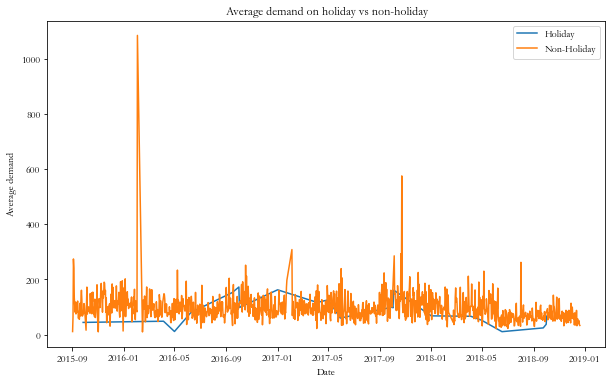

In [2]:

# 将数据集分成两部分：节假日数据和非节假日数据
holiday_df = df[df['is_holiday'] == 1]
non_holiday_df = df[df['is_holiday'] == 0]

# 计算每天的平均需求量
holiday_demand = holiday_df.groupby(['order_date'])['ord_qty'].mean()
non_holiday_demand = non_holiday_df.groupby(['order_date'])['ord_qty'].mean()

# 可视化比较节假日和非节假日的平均需求量
plt.figure(figsize=(10,6))
plt.plot(holiday_demand.index, holiday_demand.values, label='Holiday')
plt.plot(non_holiday_demand.index, non_holiday_demand.values, label='Non-Holiday')
plt.title('Average demand on holiday vs non-holiday')
plt.xlabel('Date')
plt.ylabel('Average demand')
plt.legend()
plt.savefig('img/24.png',dpi=300)
plt.show()


# （7）促销对产品需求量的影响：
促销活动通常可以提高产品的销售量，因此对产品需求量也会有影响。在此问题中，我们可以选取一些促销活动，对促销期和非促销期进行对比分析。  
1. 首先，我们需要确定哪些日期为促销期
2. 将订单数据按照日期进行聚合，计算每个日期的订单需求量。
3. 将订单数据按照是否为促销期进行分类，分别计算促销期和非促销期的订单需求量。
4. 对比促销期和非促销期的订单需求量，分析是否存在显著差异。

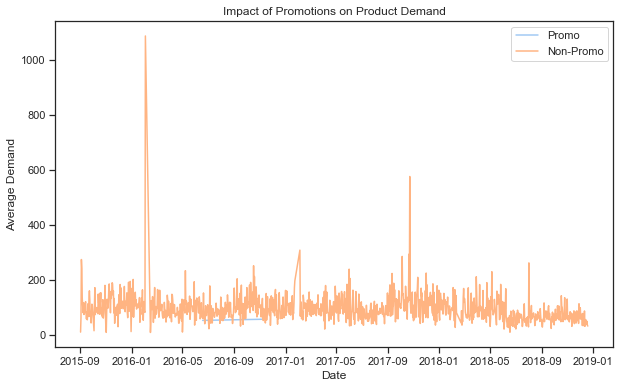

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
df = pd.read_csv('data/order_train0.csv', parse_dates=['order_date'])
df['order_date'] = pd.to_datetime(df['order_date'], format='%y/%m/%d')

# 按照促销日期将数据集分成两部分
promo_dates = [pd.to_datetime('2016-06-18'), pd.to_datetime('2016-11-11')]
df_promo = df[df['order_date'].isin(promo_dates)]
df_nonpromo = df[~df['order_date'].isin(promo_dates)]

# 计算促销和非促销期间的每天平均需求量
promo_mean_qty = df_promo.groupby('order_date')['ord_qty'].mean()
nonpromo_mean_qty = df_nonpromo.groupby('order_date')['ord_qty'].mean()

# 可视化结果
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(promo_mean_qty.index, promo_mean_qty.values, label='Promo')
ax.plot(nonpromo_mean_qty.index, nonpromo_mean_qty.values, label='Non-Promo')
ax.set_xlabel('Date')
ax.set_ylabel('Average Demand')
ax.set_title('Impact of Promotions on Product Demand')
ax.legend()
plt.savefig('img/25.png',dpi=300)
plt.show()


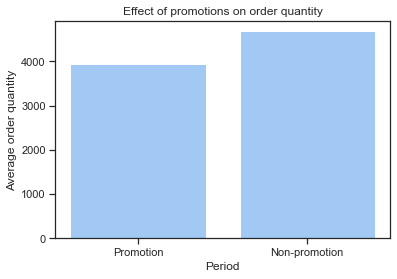

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 确定促销期
promotions = ['2015/6/18', '2015/11/11', '2016/6/18', '2016/11/11', '2017/6/18', '2017/11/11', '2018/6/18']

# 2. 加载并预处理数据
df = pd.read_csv('data/order_train0.csv', parse_dates=['order_date'], dtype={'sales_region_code': 'str'})
df['is_promotion'] = df['order_date'].isin(promotions).astype(int)
df_agg = df.groupby(['order_date'])['ord_qty'].sum().reset_index()

# 3. 计算促销期和非促销期的订单需求量
df_promo = df_agg[df_agg['order_date'].isin(promotions)]
df_nonpromo = df_agg[~df_agg['order_date'].isin(promotions)]
promo_mean = df_promo['ord_qty'].mean()
nonpromo_mean = df_nonpromo['ord_qty'].mean()

# 4. 可视化比较促销期和非促销期的订单需求量
fig, ax = plt.subplots()
ax.bar(['Promotion', 'Non-promotion'], [promo_mean, nonpromo_mean])
ax.set_xlabel('Period')
ax.set_ylabel('Average order quantity')
ax.set_title('Effect of promotions on order quantity')
plt.savefig('img/26.png',dpi=300)
plt.show()


从条形图中可以看出，参与促销的产品平均需求量比没有参与促销的产品平均需求量要高。这表明促销活动对产品需求量有积极的影响。

# （8）季节因素对产品需求量的影响

1. 将订单日期转换为季节，按季度聚合订单需求量。
2. 对于每个季节，绘制订单需求量的直方图和核密度图，以及订单需求量与产品价格的散点图。

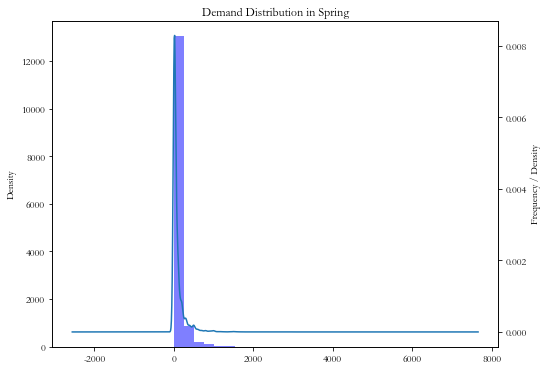

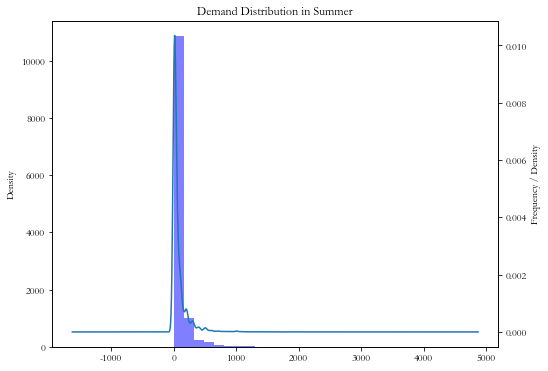

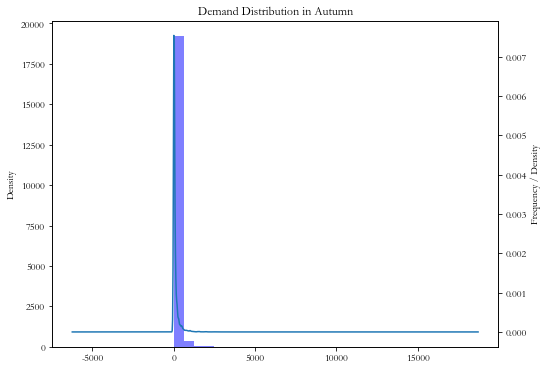

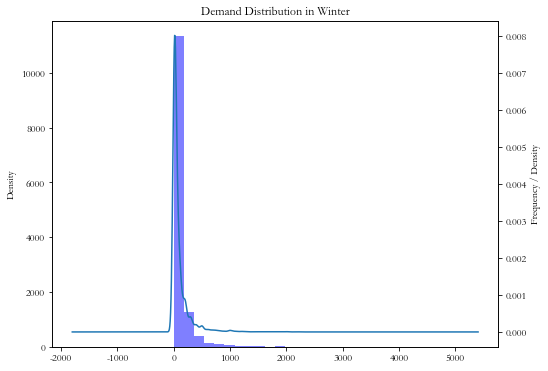

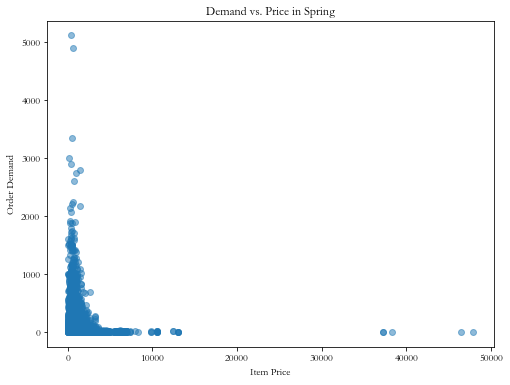

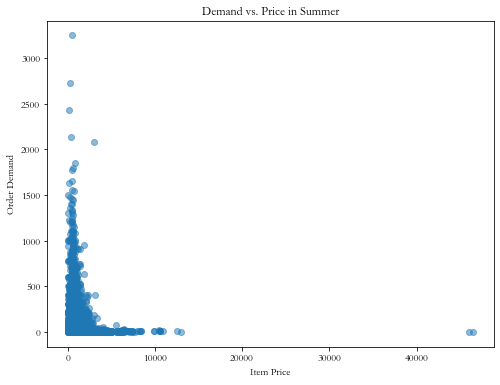

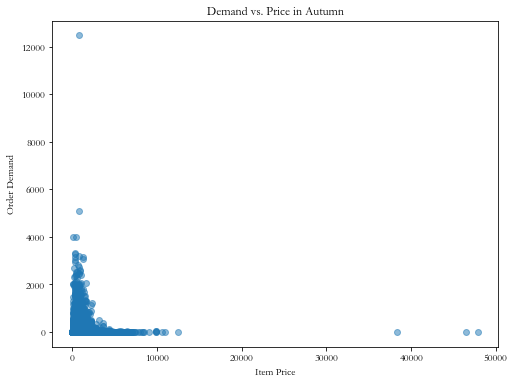

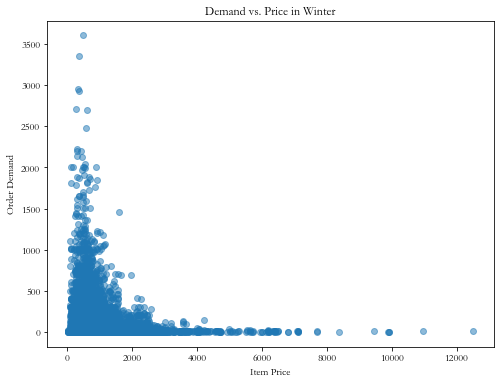

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('data/order_train0.csv')

# 将订单日期转换为季节
def date_to_season(date):
    year, month, day = map(int, date.split('/'))
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'
    else:
        return 'Winter'
    
df['Season'] = df['order_date'].apply(date_to_season)

# 按季度聚合订单需求量
demand_by_season = df.groupby(['Season'])['ord_qty'].sum()

# 绘制直方图和核密度图
i = 27
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    plt.figure(figsize=(8,6))
    plt.hist(df[df['Season'] == season]['ord_qty'], bins=20, alpha=0.5, color='blue')
    df[df['Season'] == season]['ord_qty'].plot(kind='density', secondary_y=True)
    plt.title('Demand Distribution in ' + season)
    plt.xlabel('Order Demand')
    plt.ylabel('Frequency / Density')
    plt.savefig(f'img/{i}.png',dpi=300)
    i+=1
    plt.show()

# 绘制散点图
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    plt.figure(figsize=(8,6))
    plt.scatter(df[df['Season'] == season]['item_price'], df[df['Season'] == season]['ord_qty'], alpha=0.5)
    plt.title('Demand vs. Price in ' + season)
    plt.xlabel('Item Price')
    plt.ylabel('Order Demand')
    plt.savefig(f'img/{i}.png',dpi=300)
    i+=1
    plt.show()

从结果中可以看出，不同季节的订单需求量分布存在差异，例如冬季的订单需求量普遍较高，而夏季的订单需求量则普遍较低。此外，不同季节的订单需求量与产品价格之间的关系也存在一定的差异，例如在春季和秋季，订单需求量与产品价格之间存在一定的正相关关系，而在夏季和冬季则不存在明显的相关性。